In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [2]:
df = pd.read_csv("./dataset/KSTAR_Disruption_ts_data.csv")
df.head()

,Unnamed: 0,\q95,time,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,\li,...,\TS_EDGE9:EDGE9_NE,\TS_EDGE10:EDGE10_NE,\TS_EDGE11:EDGE11_NE,\TS_EDGE12:EDGE12_NE,\TS_EDGE13:EDGE13_NE,\TS_EDGE14:EDGE14_NE,\TS_EDGE15:EDGE15_NE,\TS_EDGE16:EDGE16_NE,\TS_EDGE17:EDGE17_NE,shot
0,0,9.503320,0.15,-97237.617188,1.021017,-0.001387,0.017653,-0.863323,-0.248114,14.589464,...,1.149400e+19,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,13074
1,1,9.745522,0.20,-123203.875000,1.064507,-0.023950,0.042690,-0.465635,-0.017974,12.083524,...,1.287133e+19,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,13074
2,2,9.987725,0.25,-149170.156250,1.107996,-0.046512,0.067726,-0.067947,0.212166,9.577585,...,1.389168e+19,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,13074
3,3,10.229928,0.30,-175136.406250,1.151485,-0.069075,0.092763,0.329740,0.442306,7.071646,...,1.494251e+19,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,13074
4,4,10.472131,0.35,-201102.687500,1.194974,-0.091638,0.117800,0.727428,0.672446,4.565707,...,1.766279e+19,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,13074


In [3]:
shot_list = np.unique(df.shot.values).tolist()
shot = shot_list[-1]
df_shot = df[df.shot == shot]

In [4]:
kstar_shot_list = pd.read_csv('./dataset/KSTAR_Disruption_Shot_List.csv')
video_shot_list = np.unique(kstar_shot_list.shot.values).tolist()

In [5]:
kstar_shot_list

tTQend = kstar_shot_list[kstar_shot_list.shot == shot].tTQend.values
tftsrt = kstar_shot_list[kstar_shot_list.shot == shot].tftsrt.values
tipminf = kstar_shot_list[kstar_shot_list.shot == shot].tipminf.values

In [6]:
print("numerical variables : ", len(shot_list))
print("video shot list : ", len(video_shot_list))

numerical variables :  969
video shot list :  1096


In [7]:
df_shot = df_shot.dropna(axis = 1)

In [28]:
t = df_shot.time
ip = df_shot['\\ipmhd']
kappa = df_shot['\\kappa']
betap = df_shot['\\betap']
betan = df_shot['\\betan']
li = df_shot['\\li']
Bc = df_shot['\\bcentr']
q95 = df_shot['\\q95']
tritop = df_shot['\\tritop']
tribot = df_shot['\\tribot']
W_tot = df_shot['\\WTOT_DLM03']

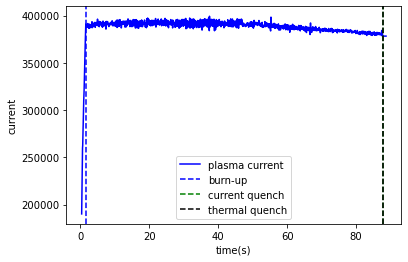

In [20]:
import matplotlib.pyplot as plt

plt.plot(t, -ip, 'b', label = 'plasma current')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('current')
plt.legend()
plt.show()

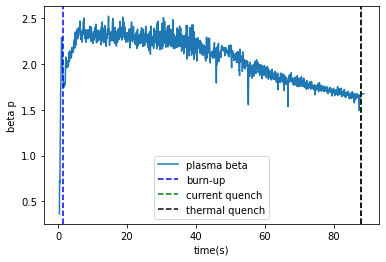

In [11]:
import matplotlib.pyplot as plt

plt.plot(t, betap, label = 'plasma beta')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('beta p')
plt.legend()
plt.show()

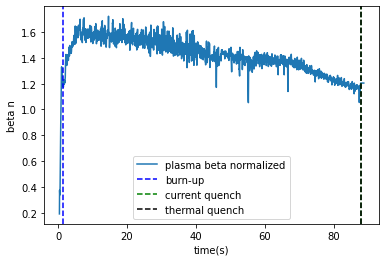

In [29]:
plt.plot(t, betan, label = 'plasma beta normalized')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('beta n')
plt.legend()
plt.show()

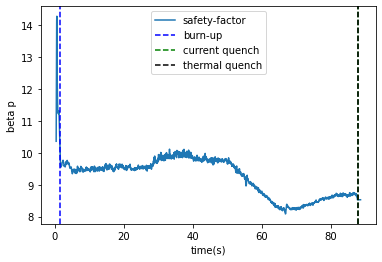

In [22]:
plt.plot(t, q95, label = 'safety-factor')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('beta p')
plt.legend()
plt.show()

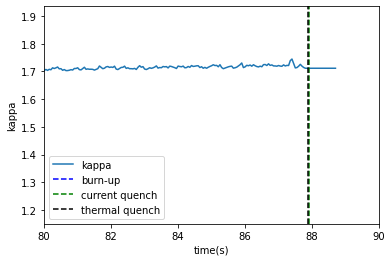

In [23]:
plt.plot(t, kappa, label = 'kappa')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('kappa')
plt.xlim([80,90])
plt.legend()
plt.show()

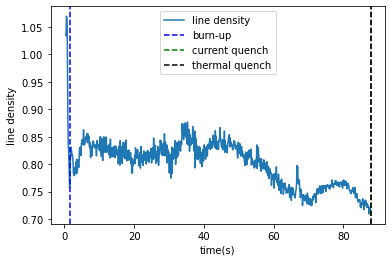

In [70]:
plt.plot(t, li, label = 'line density')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('line density')
plt.legend()
plt.show()

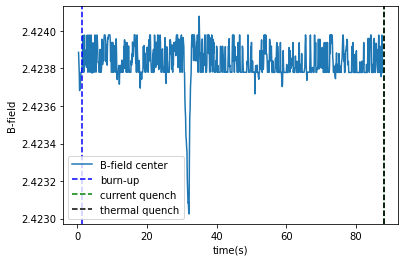

In [69]:
plt.plot(t, -Bc, label = 'B-field center')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('B-field')
plt.legend()
plt.show()

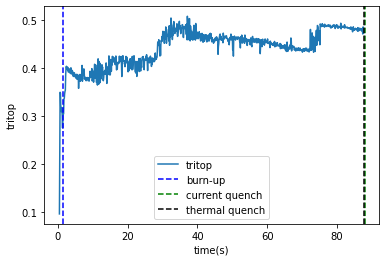

In [67]:
plt.plot(t, tritop, label = 'tritop')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('tritop')
plt.legend()
plt.show()

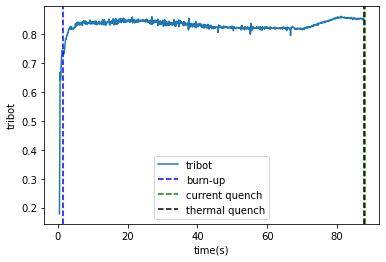

In [68]:
plt.plot(t, tribot, label = 'tribot')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('tribot')
plt.legend()
plt.show()

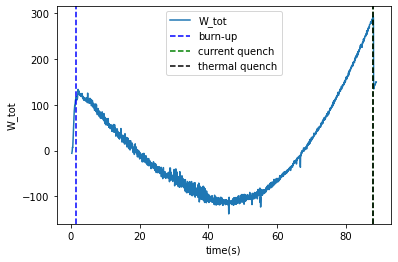

In [26]:
plt.plot(t, W_tot, label = 'W_tot')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('W_tot')
plt.legend()
plt.show()

In [51]:
ts_te_core_cols = df_shot.columns.tolist()[18:32]
ts_te_edge_cols = df_shot.columns.tolist()[32:44]
ts_ne_core_cols = df_shot.columns.tolist()[44:58]
ts_ne_edge_cols = df_shot.columns.tolist()[58:68]

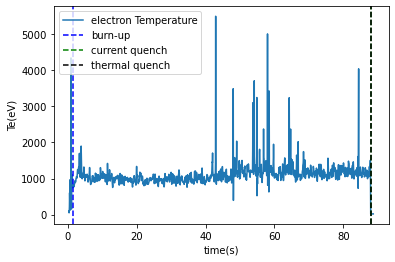

In [54]:
te_core = df_shot[ts_te_core_cols[-1]]
plt.plot(t, te_core, label = 'electron Temperature')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('Te(eV)')
plt.legend()
plt.show()

In [76]:
# interpolation
import scipy as sp
from scipy.interpolate import interp1d

cols = ['\\betap', '\\betan']
t = df_shot['time'].values.reshape(-1,)
data = df_shot[cols[0]].values
interp = interp1d(t, data)

t_extend = np.arange(min(t), max(t), 1.0 / 210)
data_extend = interp(t_extend)
data_extend

array([0.36250281, 0.39712224, 0.43174166, ..., 1.67598939, 1.67598939,
       1.67598939])

In [91]:
df_extend = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_extend.csv")
df_extend.head()

,Unnamed: 0,time,shot,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,...,\TS_EDGE6:EDGE6_NE,\TS_EDGE7:EDGE7_NE,\TS_EDGE8:EDGE8_NE,\TS_EDGE9:EDGE9_NE,\TS_EDGE10:EDGE10_NE,\TS_EDGE11:EDGE11_NE,\TS_EDGE12:EDGE12_NE,\TS_EDGE13:EDGE13_NE,\TS_EDGE14:EDGE14_NE,\TS_EDGE15:EDGE15_NE
0,0,0.000000,13074,8.776711,-19338.836011,0.890549,0.066302,-0.057457,-2.056386,-0.938534,...,1.086489e+20,3.874255e+18,4.029587e+17,7.362033e+18,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.004762,13074,8.799778,-21811.813093,0.894691,0.064153,-0.055073,-2.018511,-0.916616,...,1.070209e+20,3.967363e+18,4.579564e+17,7.493206e+18,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.009524,13074,8.822845,-24284.790175,0.898833,0.062004,-0.052688,-1.980636,-0.894698,...,1.053929e+20,4.060471e+18,5.129541e+17,7.624380e+18,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.014286,13074,8.845912,-26757.767257,0.902975,0.059855,-0.050304,-1.942761,-0.872780,...,1.037649e+20,4.153579e+18,5.679518e+17,7.755553e+18,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.019048,13074,8.868979,-29230.744339,0.907117,0.057706,-0.047919,-1.904886,-0.850862,...,1.021369e+20,4.246686e+18,6.229495e+17,7.886727e+18,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
df_shot = df_extend[df_extend.shot == shot]

t = df_shot.time
ip = df_shot['\\ipmhd']
kappa = df_shot['\\kappa']
betap = df_shot['\\betap']
betan = df_shot['\\betan']
li = df_shot['\\li']
Bc = df_shot['\\bcentr']
q95 = df_shot['\\q95']
tritop = df_shot['\\tritop']
tribot = df_shot['\\tribot']
W_tot = df_shot['\\WTOT_DLM03']

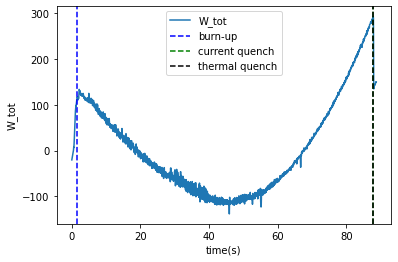

In [93]:
plt.plot(t, W_tot, label = 'W_tot')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('W_tot')
plt.legend()
plt.show()

In [129]:
ts_cols = [
    '\\q95', '\\ipmhd', '\\kappa', 
    '\\tritop', '\\tribot','\\betap','\\betan',
    '\\li', 'shot', '\\ne_inter01', '\\WTOT_DLM03'
]
# time series data
ts_data = df_extend[ts_cols]

# disruption info
kstar_shot_list = pd.read_csv('./dataset/KSTAR_Disruption_Shot_List.csv')

# shot list
shot_list = np.unique(ts_data.shot.values).tolist()

from typing import Optional, List
from tqdm.auto import tqdm

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, ts_data : pd.DataFrame, disrupt_data : pd.DataFrame, seq_len : int, cols : List, dist:int):
        self.ts_data = ts_data
        self.disrupt_data = disrupt_data
        self.seq_len = seq_len
        self.cols = cols
        self.dist = dist # distance

        self.indices = []
        self.labels = []

        self._generate_index()

    def _generate_index(self):
        shot_list = np.unique(self.ts_data.shot.values).tolist()
        df_disruption = self.disrupt_data

        for shot in tqdm(shot_list):
            tTQend = df_disruption[df_disruption.shot == shot].tTQend.values[0]
            tftsrt = df_disruption[df_disruption.shot == shot].tftsrt.values[0]
            tipminf = df_disruption[df_disruption.shot == shot].tipminf.values[0]

            df_shot = self.ts_data[self.ts_data.shot == shot]
            indices = []
            labels = []

            idx = 0
            idx_last = len(df_shot.index) - self.seq_len - self.dist

            while(idx < idx_last):
                row = df_shot.iloc[idx]
                t = row['time']

                if idx_last - idx - self.seq_len - self.dist < 0:
                    break

                if t >= tftsrt and t < tTQend - 1.0 / 210 * (self.seq_len + self.dist):
                    indices.append(idx)
                    labels.append(0)
                    idx += self.seq_len

                elif t > tTQend - 1.0 / 210 * (self.seq_len + self.dist):
                    labels.append(1)
                    idx += 1
                
                elif t < tftsrt:
                    idx += self.seq_len

            self.indices.extend(indices)
            self.labels.extend(labels)

    def __getitem__(self, idx:int):
        indx = self.indices[idx]
        label = self.labels[idx]
        label = np.array(label)
        label = torch.from_numpy(label)
        data = self.ts_data[self.cols].iloc[indx:indx+self.seq_len].values
        data = torch.from_numpy(data)
        return data, label

    def __len__(self):
        return len(self.indices)

from sklearn.model_selection import train_test_split
ts_train = df_extend
train_data = CustomDataset(ts_train, kstar_shot_list, seq_len = 21, cols = ts_cols, dist = 10)

from torch.utils.data import DataLoader
batch_size = 32
train_loader = DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = 4)

sample_data, sample_target = next(iter(train_loader))
print("sample_data : ", sample_data.size())
print("sample_target : ", sample_target.size())

  0%|          | 0/969 [00:00<?, ?it/s]

sample_data :  torch.Size([32, 21, 11])
sample_target :  torch.Size([32])


In [ ]:
from src.models.ts_transformer import TStransformer
import torch
import torch.nn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score

model = TStransformer(
    feature_dims = 128,
    max_len = 128, 
    n_layers = 1,
    n_heads = 8, 
    dropout = 0.5, 
    cls_dims = 128, 
    n_classes  = 2
)

def train_per_epoch(
    data_loader : torch.utils.data.DataLoader,
    model : torch.nn.Module,
    optimizer : torch.optim.Optimizer,
    scheduler : Optional[torch.optim.lr_scheduler._LRScheduler],
    loss_fn : torch.nn.Module,
    device : str = "cpu",
    max_norm_grad : Optional[float] = None
    ):

    model.train()
    model.to(device)

    train_loss = 0
    train_acc = 0

    total_pred = np.array([])
    total_label = np.array([])

    for batch_idx, (data, target) in enumerate(data_loader):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()

        # use gradient clipping
        if max_norm_grad:
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm_grad)

        optimizer.step()

        train_loss += loss.item()

        pred = torch.nn.functional.softmax(output, dim = 1).max(1, keepdim = True)[1]
        train_acc += pred.eq(target.view_as(pred)).sum().item() / data.size(0) 
    
        total_pred = np.concatenate((total_pred, pred.cpu().numpy().reshape(-1,)))
        total_label = np.concatenate((total_label, target.cpu().numpy().reshape(-1,)))
        
    if scheduler:
        scheduler.step()

    train_loss /= (batch_idx + 1)
    train_acc /= (batch_idx + 1)

    train_f1 = f1_score(total_label, total_pred, average = "macro")

    return train_loss, train_acc, train_f1


def valid_per_epoch(
    data_loader : torch.utils.data.DataLoader,
    model : torch.nn.Module,
    optimizer : torch.optim.Optimizer,
    loss_fn : torch.nn.Module,
    device : str = "cpu",
    ):

    model.eval()
    model.to(device)

    valid_loss = 0
    valid_acc = 0

    total_pred = np.array([])
    total_label = np.array([])

    for batch_idx, (data, target) in enumerate(data_loader):
        with torch.no_grad():
            optimizer.zero_grad()
            data = data.to(device)
            target = target.to(device)
            output = model(data)
            loss = loss_fn(output, target)
            valid_loss += loss.item()

            pred = torch.nn.functional.softmax(output, dim = 1).max(1, keepdim = True)[1]
            valid_acc += pred.eq(target.view_as(pred)).sum().item() / data.size(0) 
        
            total_pred = np.concatenate((total_pred, pred.cpu().numpy().reshape(-1,)))
            total_label = np.concatenate((total_label, target.cpu().numpy().reshape(-1,)))

    valid_loss /= (batch_idx + 1)
    valid_acc /= (batch_idx + 1)

    valid_f1 = f1_score(total_label, total_pred, average = "macro")

    return valid_loss, valid_acc, valid_f1


def train(
    train_loader : torch.utils.data.DataLoader, 
    valid_loader : Optional[torch.utils.data.DataLoader],
    model : torch.nn.Module,
    optimizer : torch.optim.Optimizer,
    scheduler : Optional[torch.optim.lr_scheduler._LRScheduler],
    loss_fn = None,
    device : str = "cpu",
    num_epoch : int = 64,
    verbose : Optional[int] = 8,
    save_best_dir : str = "./weights/best.pt",
    save_last_dir : str = "./weights/last.pt",
    max_norm_grad : Optional[float] = None,
    criteria : str = "f1_score"
    ):

    train_loss_list = []
    valid_loss_list = []
    
    train_acc_list = []
    valid_acc_list = []

    train_f1_list = []
    valid_f1_list = []

    best_acc = 0
    best_epoch = 0
    best_f1 = 0
    best_loss = torch.inf

    if loss_fn is None:
        loss_fn = torch.nn.CrossEntropyLoss(reduction = 'mean')

    for epoch in tqdm(range(num_epoch), desc = "training process"):

        train_loss, train_acc, train_f1 = train_per_epoch(
            train_loader, 
            model,
            optimizer,
            scheduler,
            loss_fn,
            device,
            max_norm_grad
        )

        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        train_f1_list.append(train_f1)

        if valid_loader:
            valid_loss, valid_acc, valid_f1 = valid_per_epoch(
                valid_loader, 
                model,
                optimizer,
                loss_fn,
                device 
            )
            
            valid_loss_list.append(valid_loss)
            valid_acc_list.append(valid_acc)
            valid_f1_list.append(valid_f1)

        if verbose:
            if epoch % verbose == 0:
                print("epoch : {}, train loss : {:.3f}, valid loss : {:.3f}, train acc : {:.3f}, valid acc : {:.3f}, train f1 : {:.3f}, valid f1 : {:.3f}".format(
                    epoch+1, train_loss, valid_loss, train_acc, valid_acc, train_f1, valid_f1
                ))

        # save the best parameters
        if criteria == "acc" and best_acc < valid_acc:
            best_acc = valid_acc
            best_f1 = valid_f1
            best_loss = valid_loss
            best_epoch  = epoch
            torch.save(model.state_dict(), save_best_dir)
        elif criteria == "f1_score" and best_f1 < valid_f1:
            best_acc = valid_acc
            best_f1 = valid_f1
            best_loss = valid_loss
            best_epoch  = epoch
            torch.save(model.state_dict(), save_best_dir)
        elif criteria == "loss" and best_loss > valid_loss:
            best_acc = valid_acc
            best_f1 = valid_f1
            best_loss = valid_loss
            best_epoch  = epoch
            torch.save(model.state_dict(), save_best_dir)

        # save the last parameters
        torch.save(model.state_dict(), save_last_dir)

    # print("\n============ Report ==============\n")
    print("training process finished, best loss : {:.3f} and best acc : {:.3f}, best f1 : {:.3f}, best epoch : {}".format(
        best_loss, best_acc, best_f1, best_epoch
    ))

    return  train_loss_list, train_acc_list, train_f1_list,  valid_loss_list,  valid_acc_list, valid_f1_list



